# Student Score Data Analysis Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv("E:\Documents\Student Scores.csv")
df.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [24]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [28]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [36]:
# drop unnamed column by column
df = df.drop('Unnamed: 0',axis=1)
df.head(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [50]:
df['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

In [60]:
# change weekly study hour column

df['WklyStudyHours']=df['WklyStudyHours'].str.replace('5 - 10','5-10')
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5-10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5-10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5-10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5-10,82,90,93


## Gender Distribution

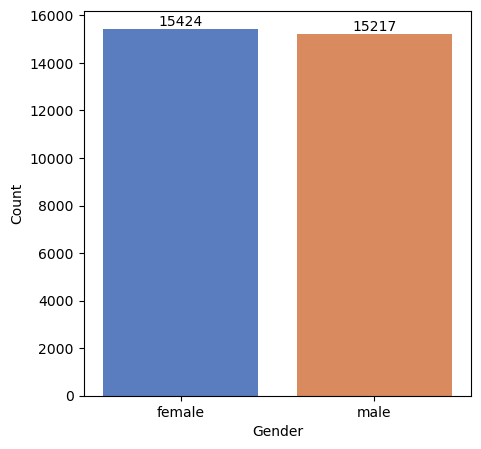

In [87]:
plt.figure(figsize=(5,5))

ax = sns.countplot(data=df, x='Gender',palette='muted')

plt.xlabel('Gender')
plt.ylabel('Count')

for bars in ax.containers:
    ax.bar_label(bars)

Conclusion: Number of females are greater as compared to that of males 

## Impact of parent education on student scores

In [193]:
db = df.groupby(['ParentEduc']).agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
db

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


<Axes: ylabel='ParentEduc'>

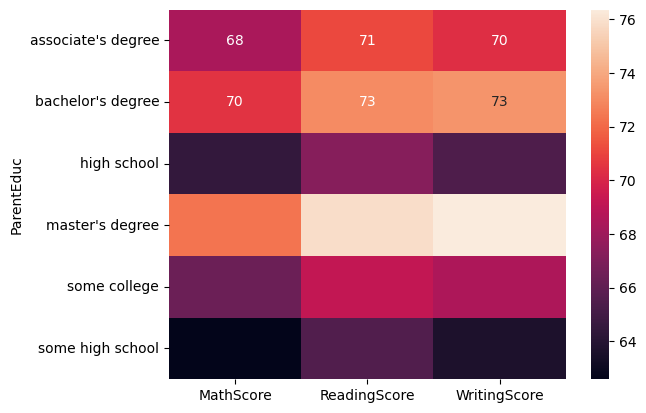

In [100]:
sns.heatmap(db, annot=True)

Conclusion: Parents education plays a significant role over the scores of students. Children of highly educated parents scored higher scores.

In [197]:
db

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


In [201]:
edu = df.groupby(['ParentEduc']).agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}).reset_index()
edu_melted = pd.melt(edu,['ParentEduc'])
edu_melted

,ParentEduc,variable,value
0,associate's degree,MathScore,68.365586
1,bachelor's degree,MathScore,70.466627
2,high school,MathScore,64.435731
3,master's degree,MathScore,72.336134
4,some college,MathScore,66.390472
5,some high school,MathScore,62.584013
6,associate's degree,ReadingScore,71.124324
7,bachelor's degree,ReadingScore,73.062020
8,high school,ReadingScore,67.213997
9,master's degree,ReadingScore,75.832921


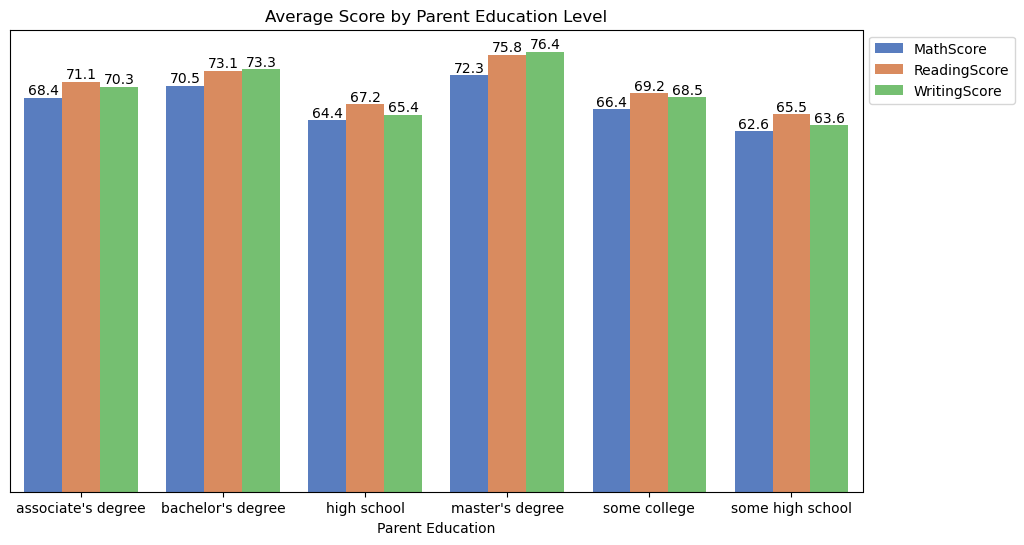

In [223]:
plt.figure(figsize=(11,6))
ax = sns.barplot(data=edu_melted, x='ParentEduc', y='value',hue='variable', palette='muted')
plt.title('Average Score by Parent Education Level')
plt.xlabel('Parent Education')
plt.ylabel('Score')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f')
    
# hide y axis
ax.yaxis.set_visible(False)

Higher Parental Education: Students whose parents have higher levels of education (e.g., master's or bachelor's degrees) tend to score higher across all subjects.
Lower Parental Education: Students whose parents have less formal education (e.g., some high school or high school) generally have lower average scores.

## Impact of parent marital status on student scores

In [109]:
gb = df.groupby(['ParentMaritalStatus']).agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


<Axes: ylabel='ParentMaritalStatus'>

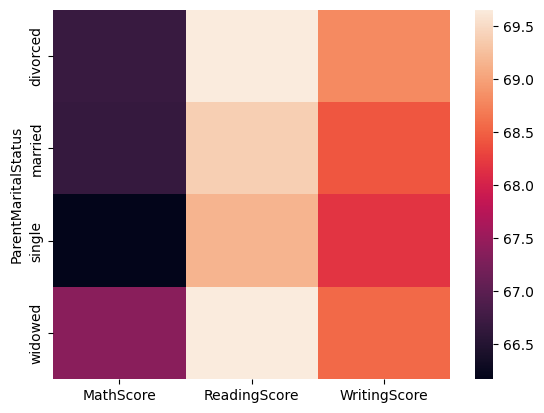

In [111]:
sns.heatmap(gb)

Conclusion: Parents marital status has a negligible effect over the scores of students.

<Axes: xlabel='MathScore', ylabel='NrSiblings'>

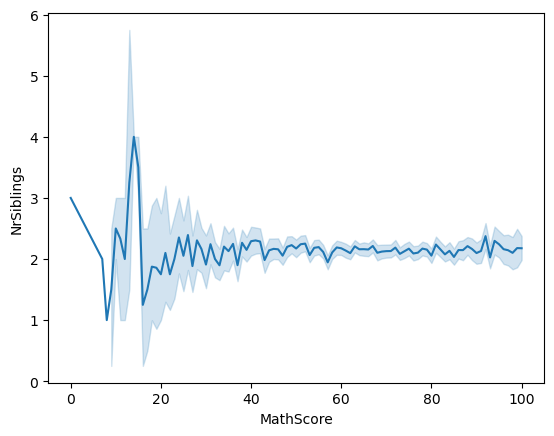

In [116]:
sns.lineplot(data = df, y = 'NrSiblings', x='MathScore')

## Checking Outliers

<Axes: xlabel='MathScore'>

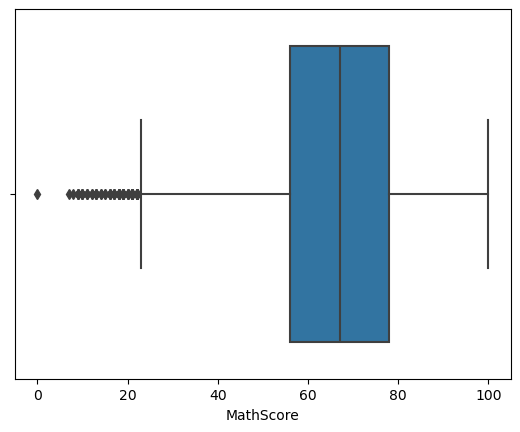

In [133]:
sns.boxplot(data=df,x='MathScore')

<Axes: xlabel='ReadingScore'>

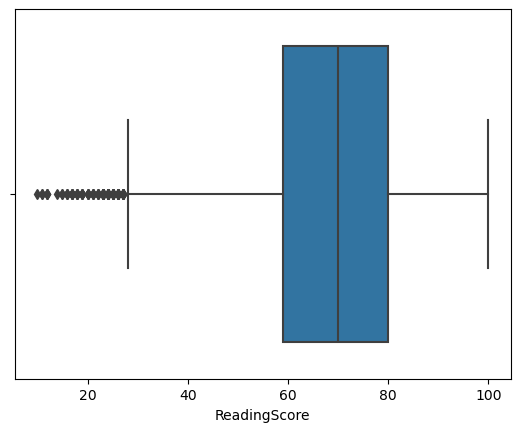

In [121]:
sns.boxplot(data=df,x='ReadingScore')

<Axes: xlabel='WritingScore'>

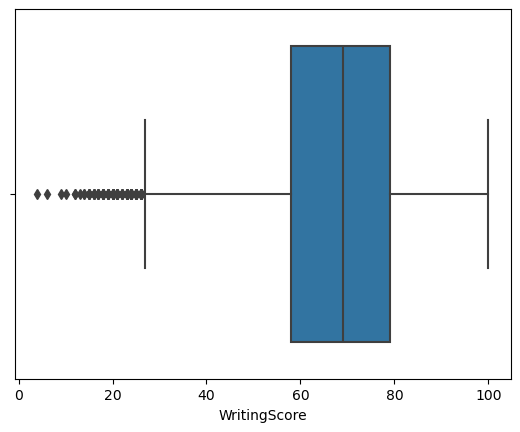

In [125]:
sns.boxplot(data=df,x='WritingScore')

## Ethnic Groups Distribution

Text(0.5, 1.0, 'Ethnic group distribution')

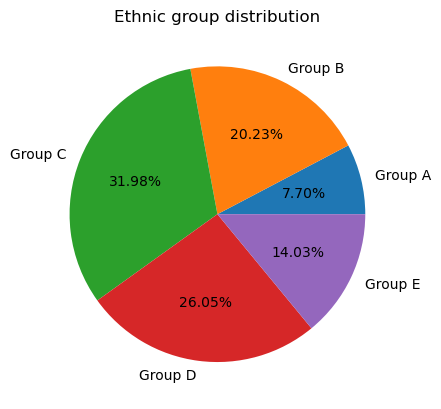

In [148]:
#df['EthnicGroup'].value_counts().plot(kind='pie')

GroupA = df.loc[(df['EthnicGroup']=='group A')].count()
GroupB = df.loc[(df['EthnicGroup']=='group B')].count()
GroupC = df.loc[(df['EthnicGroup']=='group C')].count()
GroupD = df.loc[(df['EthnicGroup']=='group D')].count()
GroupE = df.loc[(df['EthnicGroup']=='group E')].count()

l = ['Group A','Group B','Group C','Group D','Group E']
mlist = [GroupA['EthnicGroup'],GroupB['EthnicGroup'],GroupC['EthnicGroup'],GroupD['EthnicGroup'],GroupE['EthnicGroup']]

plt.pie(mlist, labels=l, autopct = '%1.2f%%')
plt.title('Ethnic group distribution')

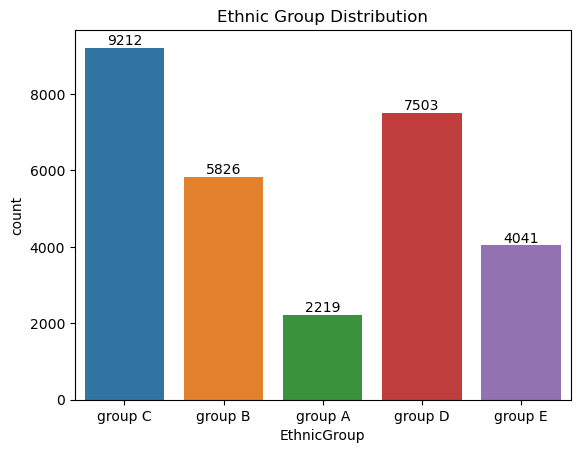

In [152]:
ax = sns.countplot(data=df, x='EthnicGroup')
plt.title('Ethnic Group Distribution')
for bars in ax.containers:
    ax.bar_label(bars)

In [158]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

## Impact of Test Preparation on Scores

In [161]:
df.head(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5-10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5-10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [169]:
#df.groupby(['TestPrep']).agg[{'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}]
mean_scores = df.groupby('TestPrep')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()
mean_scores_melted = pd.melt(mean_scores, ['TestPrep'])
mean_scores_melted

,TestPrep,variable,value
0,completed,MathScore,69.546660
1,none,MathScore,64.948770
2,completed,ReadingScore,73.732998
3,none,ReadingScore,67.051071
4,completed,WritingScore,74.703265
5,none,WritingScore,65.092756


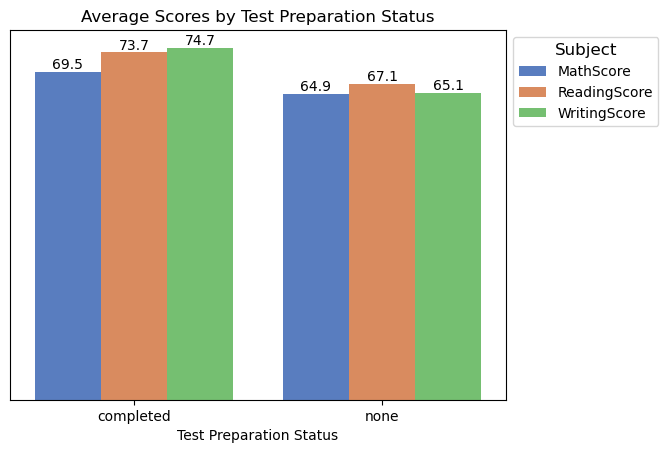

In [227]:
ax = sns.barplot(data=mean_scores_melted, x='TestPrep', y='value', hue='variable', palette='muted')

plt.title('Average Scores by Test Preparation Status')
plt.ylabel('Average Score')
plt.xlabel('Test Preparation Status')
plt.legend(title='Subject', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f')

ax.yaxis.set_visible(False)

Students with Test Prep tend to have higher average scores across all subjects (Math, Reading, and Writing).
Students without Test Prep average scores are consistently lower in comparison.

## Influence of Sports

In [236]:
mean_scores1 = df.groupby('PracticeSport')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()
mean_scores_melted1 = pd.melt(mean_scores1, ['PracticeSport'])
mean_scores_melted1

,PracticeSport,variable,value
0,never,MathScore,64.171079
1,regularly,MathScore,67.839155
2,sometimes,MathScore,66.274831
3,never,ReadingScore,68.337662
4,regularly,ReadingScore,69.943019
5,sometimes,ReadingScore,69.241307
6,never,WritingScore,66.522727
7,regularly,WritingScore,69.604003
8,sometimes,WritingScore,68.072438


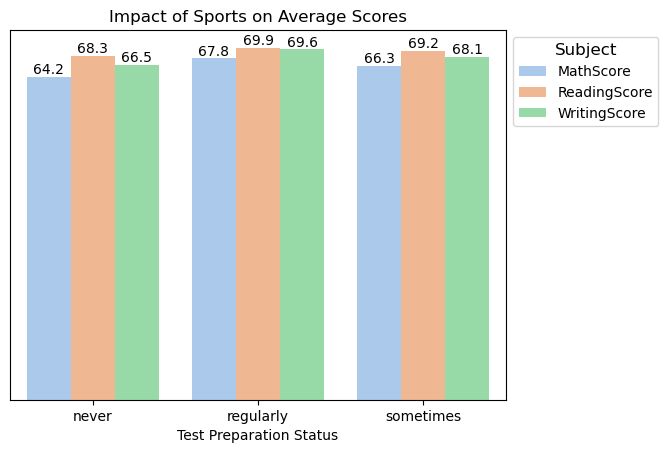

In [266]:
ax = sns.barplot(data=mean_scores_melted1, x='PracticeSport', y='value', hue='variable', palette='pastel')

plt.title('Impact of Sports on Average Scores')
plt.ylabel('Average Score')
plt.xlabel('Test Preparation Status')
plt.legend(title='Subject', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f')

ax.yaxis.set_visible(False)

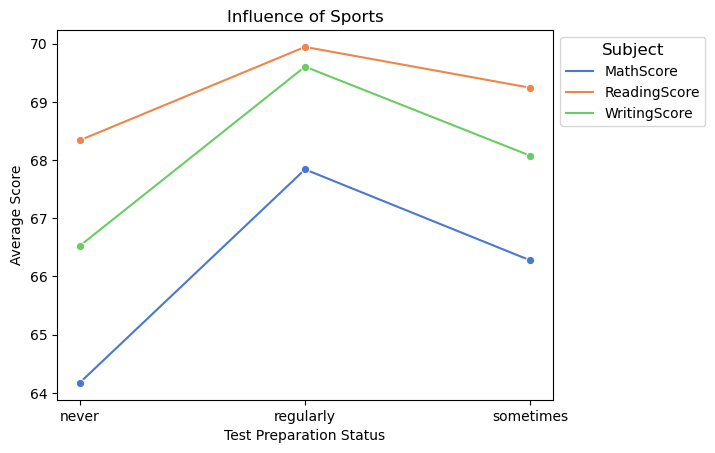

In [277]:
sns.lineplot(data=mean_scores_melted1, x='PracticeSport', y='value', hue='variable', palette='muted', marker='o')

plt.title('Influence of Sports')
plt.ylabel('Average Score')
plt.xlabel('Test Preparation Status')
plt.legend(title='Subject', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

Students who are actively participating in sports score higher marks as compared to students particating ocassionally or not.

## Study Hours

In [257]:
mean_scores2 = df.groupby('WklyStudyHours')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()
mean_scores_melted2 = pd.melt(mean_scores2, ['WklyStudyHours'])
mean_scores_melted2

,WklyStudyHours,variable,value
0,5-10,MathScore,66.870491
1,< 5,MathScore,64.580359
2,> 10,MathScore,68.696655
3,5-10,ReadingScore,69.660532
4,< 5,ReadingScore,68.176135
5,> 10,ReadingScore,70.365436
6,5-10,WritingScore,68.636280
7,< 5,WritingScore,67.090192
8,> 10,WritingScore,69.777778


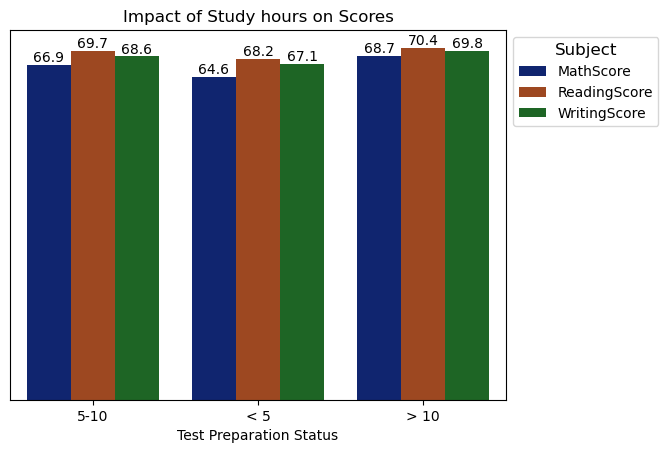

In [264]:
ax = sns.barplot(data=mean_scores_melted2, x='WklyStudyHours', y='value', hue='variable', palette='dark')

plt.title('Impact of Study hours on Scores')
plt.ylabel('Average Score')
plt.xlabel('Test Preparation Status')
plt.legend(title='Subject', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f')

ax.yaxis.set_visible(False)

With the increase in study hours the result of student also gets affected positively.

## Impact of Lunch Type

In [272]:
mean_scores3 = df.groupby('LunchType')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()
mean_scores_melted3 = pd.melt(mean_scores3, ['LunchType'])
mean_scores_melted3

,LunchType,variable,value
0,free/reduced,MathScore,58.862332
1,standard,MathScore,70.709370
2,free/reduced,ReadingScore,64.189735
3,standard,ReadingScore,72.175634
4,free/reduced,WritingScore,62.650522
5,standard,WritingScore,71.529716


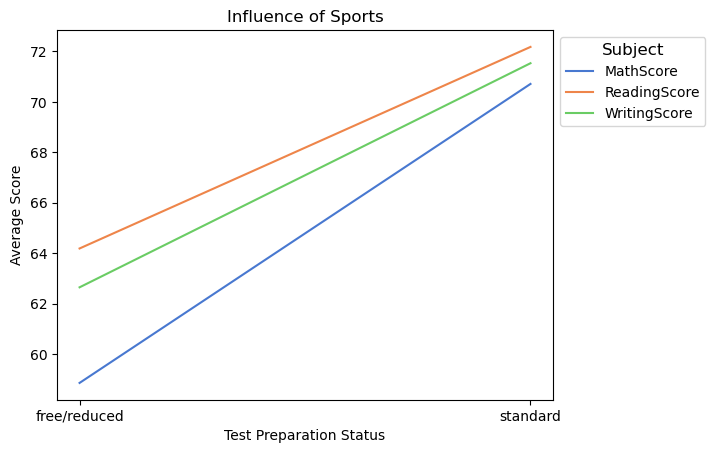

In [274]:
sns.lineplot(data=mean_scores_melted3, x='LunchType', y='value', hue='variable', palette='muted')

plt.title('Influence of Sports')
plt.ylabel('Average Score')
plt.xlabel('Test Preparation Status')
plt.legend(title='Subject', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

Students taking a proper meal perform better in academics.